### Buisness Case

- Purpose: to analyze train delays in France
- Stakeholder: a railroad manager who needs to identify the reasons for delays on selected rail lines

1. We need only data with delayes or train cancelation
2. 

### ToDo

1. Zamiana kolumny month na int64
2. Usuniecie niepotrzebnych kolumn
3. Sprawdzenie NaN
4. Suma Number of late dep + Number of late arr
5. Outlinersy
6. HeatMap
7. Korelacje
8. Stworzenie kategorii opozniej 'small', 'medium', 'high', 'very high'

### Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import DataCleainingFunctions as dc
import missingno as ms

### Notebook Options

In [2]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

### Dataset Imports

In [3]:
# Read train dataset 
df = pd.read_csv('CSV\Regularities_by_liaisons_Trains_France.csv')

In [4]:
df.head()

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),Comment (optional) delays on arrival,"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,41.0,22.924797,5.233333,NaN,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,47.0,27.085106,6.123967,NaN,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,91.0,18.440659,4.430194,"Ce mois ci, la destination a été marquée par l...",0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,15.0,20.618889,3.812135,NaN,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,73.0,19.608447,4.176208,NaN,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


### Data Check & Inspection

In [5]:
# Check main informations about dataset
dc.stats(df)

### Shape ###
Rows: 7806
Columns: 32


### Data Types ###
Year                                                                                                                     int64
Month                                                                                                                  float64
Departure station                                                                                                       object
Arrival station                                                                                                         object
Average travel time (min)                                                                                              float64
Number of expected circulations                                                                                        float64
Number of cancelled trains                                                                                             float64
Number of late trains at departure                   

In [6]:
# Information about missing values, only values bigger than 0
dc.miss_dupl(df)



### Missing Values ###
Average travel time (min)                                                                                                63
Number of expected circulations                                                                                          63
Average delay of all departing trains (min)                                                                              63
Comment (optional) delays at departure                                                                                 7806
Number of trains late on arrival                                                                                        100
Average delay of late arriving trains (min)                                                                             101
Average delay of all arriving trains (min)                                                                               63
Comment (optional) delays on arrival                                                                       

In [7]:
# Numeric information about columns
df.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
count,7806.000000,7806.000000,7743.000000,7743.000000,7806.000000,7806.000000,7806.000000,7743.000000,0.0,7706.000000,7705.000000,7743.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7738.000000,7699.000000,7738.000000,7738.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000
mean,2017.345119,6.216372,166.759261,266.510913,7.911478,63.519088,14.744145,2.956191,NaN,36.019595,32.737533,5.212800,0.267085,0.255042,0.191950,0.181099,0.067688,0.036435,24.545231,29.379555,11.055441,4.000129,26.708546,25.504166,19.195005,18.109877,6.768831,3.643517
std,1.596611,3.440601,80.737092,157.456548,20.997806,78.822324,13.373758,5.951154,NaN,29.210396,14.009948,8.397351,0.162804,0.160101,0.148808,0.132821,0.078780,0.057827,20.323532,18.929319,9.921009,4.459822,16.280439,16.010052,14.880847,13.282123,7.877975,5.782651
min,2015.000000,1.000000,35.888889,1.000000,0.000000,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,-472.638889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.643605,163.000000,0.000000,12.000000,7.559617,1.007765,NaN,16.000000,23.809420,2.829885,0.156250,0.150000,0.086957,0.092593,0.000000,0.000000,10.000000,9.177749,4.000000,1.000000,15.625000,15.000000,8.695652,9.259259,0.000000,0.000000
50%,2017.000000,6.000000,162.178808,227.000000,1.000000,33.000000,13.535727,2.014571,NaN,28.000000,30.875000,4.680056,0.250000,0.235294,0.171429,0.161290,0.050000,0.017544,19.000000,32.022500,8.000000,3.000000,25.000000,23.529412,17.142857,16.129032,5.000000,1.754386
75%,2019.000000,9.000000,207.885957,352.000000,6.000000,84.000000,18.713366,3.691398,NaN,48.000000,39.124653,7.278924,0.357143,0.333333,0.269231,0.250000,0.100000,0.055556,33.000000,41.313095,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,786.500000,960.000000,279.000000,591.000000,316.188095,173.571429,NaN,235.000000,258.000000,83.388889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


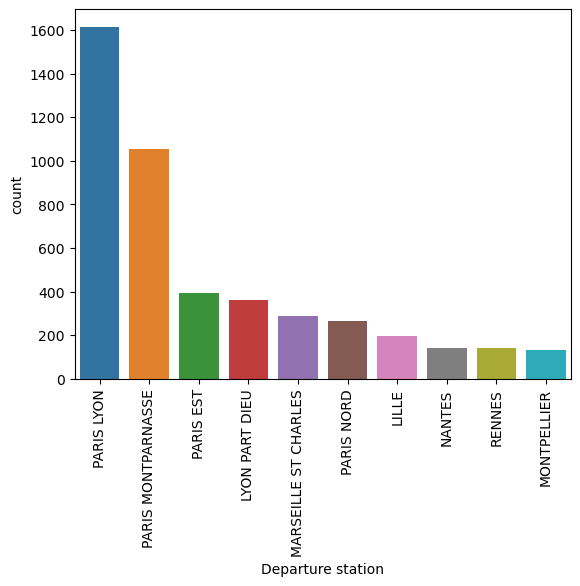

In [8]:
# Chart with top 10 Departure stations
sns.countplot(data = df, x = "Departure station", order = df['Departure station'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

In [9]:
# Freq for averege delay of departing trains
df['Average delay of all departing trains (min)'].value_counts()

Average delay of all departing trains (min)
0.000000    8
1.000000    7
1.366667    5
0.400000    4
0.250000    4
           ..
0.932124    1
3.640326    1
7.249435    1
0.575194    1
2.055769    1
Name: count, Length: 7575, dtype: int64

In [10]:
# Freq for averege delay of arriving trains
df['Average delay of all arriving trains (min)'].value_counts()

Average delay of all arriving trains (min)
 3.000000    6
 4.000000    4
 2.666667    4
 6.000000    3
 3.200000    3
            ..
 4.345986    1
 2.410344    1
 3.260750    1
 3.341613    1
-0.457051    1
Name: count, Length: 7619, dtype: int64

In [11]:
# Conditions for only trains with delay above 0 mins
arr = df['Average delay of all arriving trains (min)'] > 0
dep = df['Average delay of all departing trains (min)'] > 0

In [12]:
# Filtering data set according to conditions
df = df[arr & dep]

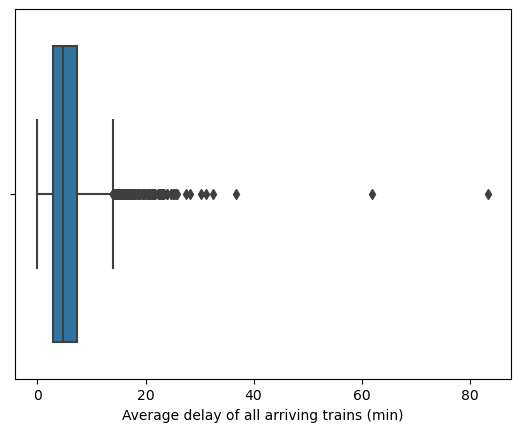

In [13]:
# Chart showing distributions for all arrving trains delays
sns.boxplot(data= df, x = 'Average delay of all arriving trains (min)')
plt.show()

In [14]:
# Top 10 Arrival stations in dataset
df['Arrival station'].value_counts().head(10)

Arrival station
PARIS LYON              1533
PARIS MONTPARNASSE      1031
PARIS EST                368
LYON PART DIEU           353
MARSEILLE ST CHARLES     256
PARIS NORD               238
LILLE                    190
RENNES                   140
NANTES                   137
STRASBOURG               128
Name: count, dtype: int64

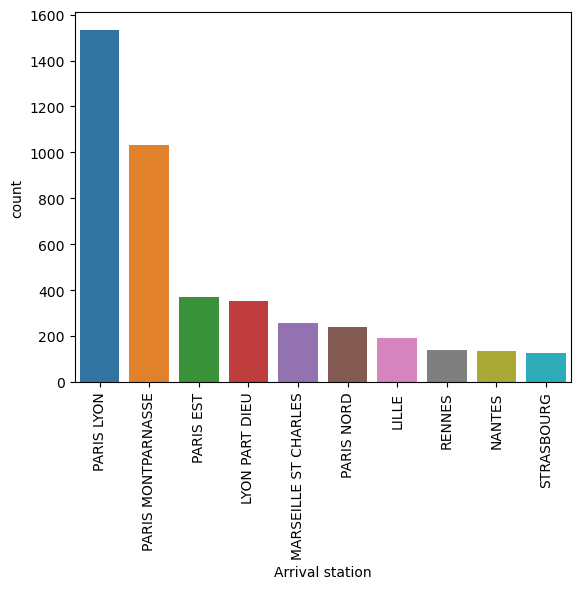

In [15]:
# Chart with top 10 Arrival stations
sns.countplot(data = df, x = "Arrival station", order = df['Arrival station'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

In [16]:
# Top 10 Departure stations
top_10_dep_stations = df['Departure station'].value_counts().head(10).index
top_10_dep_stations

Index(['PARIS LYON', 'PARIS MONTPARNASSE', 'PARIS EST', 'LYON PART DIEU',
       'MARSEILLE ST CHARLES', 'PARIS NORD', 'LILLE', 'NANTES', 'RENNES',
       'MONTPELLIER'],
      dtype='object', name='Departure station')

In [17]:
top_10 = round((len(df[df['Departure station'].isin(top_10_dep_stations)]) / len(df) ) * 100, 2)

In [18]:
print(f'Top 10 Departure Station is {top_10} % of whole dataset.')

Top 10 Departure Station is 59.37 % of whole dataset.


In [ ]:
### Data Cleaning

In [ ]:
# Copy of dataset
df_clean = df.copy()

In [ ]:
# Save dataset to new CSV file
df_clean.to_csv('CSV\Clean_DataSet_Trains.csv')